# TP2: Machine Learning

In [28]:
import pandas as pd

# import ML packages
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

# import Plotting pckgs
from matplotlib import pyplot as plt
%matplotlib inline

In [72]:
trainingSet = pd.read_csv('../CSVs/improved_trip_train.csv')
testingSet = pd.read_csv('../CSVs/improved_trip_test.csv')
trainingSet.dtypes

id                     int64
duration               int64
start_date            object
start_dayOfWeek        int64
start_week             int64
start_quarter          int64
start_time            object
start_hour             int64
start_minute           int64
start_station_name    object
start_station_id       int64
end_date              object
end_dayOfWeek          int64
end_week               int64
end_quarter            int64
end_time              object
end_hour               int64
end_minute             int64
end_station_name      object
end_station_id         int64
bike_id                int64
subscription_type     object
zip_code              object
dtype: object

In [23]:
trainingSet.head()

,id,duration,start_date,start_dayOfWeek,start_week,start_quarter,start_time,start_hour,start_minute,start_station_name,...,end_week,end_quarter,end_time,end_hour,end_minute,end_station_name,end_station_id,bike_id,subscription_type,zip_code
0,907649,396,2015-08-27,3,35,3,08:36:00,8,36,Harry Bridges Plaza (Ferry Building),...,35,3,08:43:00,8,43,Embarcadero at Sansome,60,187,Subscriber,94602
1,384043,636,2014-07-28,0,31,3,22:06:00,22,6,Market at 10th,...,31,3,22:17:00,22,17,Washington at Kearny,46,417,Subscriber,94133
2,316176,334,2014-06-09,0,24,2,08:42:00,8,42,Market at Sansome,...,24,2,08:47:00,8,47,2nd at Folsom,62,281,Subscriber,94107
3,618874,666,2015-01-26,0,5,1,16:55:00,16,55,San Francisco Caltrain 2 (330 Townsend),...,5,1,17:07:00,17,7,Temporary Transbay Terminal (Howard at Beale),55,634,Subscriber,94602
4,910977,318,2015-08-29,5,35,3,15:09:00,15,9,Market at 10th,...,35,3,15:14:00,15,14,Powell Street BART,39,607,Subscriber,94709


In [13]:
trainingSet['start_date'] = pd.to_datetime(trainingSet.start_date)
trainingSet['start_time'] = pd.to_datetime(trainingSet.start_time)

trainingSet['end_date'] = pd.to_datetime(trainingSet.end_date)
trainingSet['end_time'] = pd.to_datetime(trainingSet.end_time)

KeyboardInterrupt: 

In [14]:
trainingSet.dtypes

id                             int64
duration                       int64
start_date            datetime64[ns]
start_station_name            object
start_station_id               int64
end_date              datetime64[ns]
end_station_name              object
end_station_id                 int64
bike_id                        int64
subscription_type             object
zip_code                      object
start_dayOfWeek                int64
start_week                     int64
start_quarter                  int64
start_time            datetime64[ns]
start_hour                     int64
start_minute                   int64
end_dayOfWeek                  int64
end_week                       int64
end_quarter                    int64
end_time                      object
end_hour                       int64
end_minute                     int64
dtype: object

In [15]:
trainingSet.head()

,id,duration,start_date,start_station_name,start_station_id,end_date,end_station_name,end_station_id,bike_id,subscription_type,...,start_quarter,start_time,start_hour,start_minute,end_dayOfWeek,end_week,end_quarter,end_time,end_hour,end_minute
0,907649,396,2015-08-27,Harry Bridges Plaza (Ferry Building),50,2015-08-27,Embarcadero at Sansome,60,187,Subscriber,...,3,2017-06-01 08:36:00,8,36,3,35,3,08:43:00,8,43
1,384043,636,2014-07-28,Market at 10th,67,2014-07-28,Washington at Kearny,46,417,Subscriber,...,3,2017-06-01 22:06:00,22,6,0,31,3,22:17:00,22,17
2,316176,334,2014-06-09,Market at Sansome,77,2014-06-09,2nd at Folsom,62,281,Subscriber,...,2,2017-06-01 08:42:00,8,42,0,24,2,08:47:00,8,47
3,618874,666,2015-01-26,San Francisco Caltrain 2 (330 Townsend),69,2015-01-26,Temporary Transbay Terminal (Howard at Beale),55,634,Subscriber,...,1,2017-06-01 16:55:00,16,55,0,5,1,17:07:00,17,7
4,910977,318,2015-08-29,Market at 10th,67,2015-08-29,Powell Street BART,39,607,Subscriber,...,3,2017-06-01 15:09:00,15,9,5,35,3,15:14:00,15,14


In [16]:
trainingSet.shape

(549961, 23)

In [42]:
# Initialize the model with 2 parameters -- number of clusters and random state.
kmeans_model = KMeans()
# kmeans_model = KMeans(n_clusters=5, random_state=1)
# Get only the numeric columns from games.
good_columns = trainingSet._get_numeric_data()
# good_columns

# Fit the model using the good columns.
kmeans_model.fit(good_columns)
# Get the cluster assignments.
labels = kmeans_model.labels_

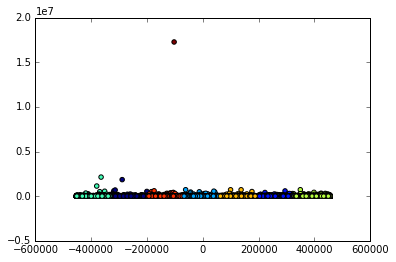

In [48]:
# Import the PCA model.
from sklearn.decomposition import PCA

# Create a PCA model.
pca_2 = PCA(2)
# Fit the PCA model on the numeric columns from earlier.
plot_columns = pca_2.fit_transform(good_columns)
# Make a scatter plot of each game, shaded according to cluster assignment.
plt.scatter(x=plot_columns[:,0], y=plot_columns[:,1], c=labels)
# Show the plot.
plt.show()

### Let's study correlation between data

In [60]:
trainingSet.corr()['duration']

id                 -0.003133
duration            1.000000
start_dayOfWeek     0.018351
start_week          0.004002
start_quarter       0.003648
start_hour          0.002598
start_minute        0.002586
start_station_id   -0.007001
end_dayOfWeek       0.013753
end_week            0.002100
end_quarter         0.001376
end_hour            0.009626
end_minute         -0.000530
end_station_id     -0.006026
bike_id            -0.001569
Name: duration, dtype: float64

We can see that the duration is most correlated with:
    - start_dayOfWeek     0.018351
    - end_dayOfWeek       0.013753
    - end_hour            0.009626
    - start_station_id   -0.007001

In [64]:
columns = trainingSet.columns.tolist()
columns

['id',
 'duration',
 'start_date',
 'start_dayOfWeek',
 'start_week',
 'start_quarter',
 'start_time',
 'start_hour',
 'start_minute',
 'start_station_name',
 'start_station_id',
 'end_date',
 'end_dayOfWeek',
 'end_week',
 'end_quarter',
 'end_time',
 'end_hour',
 'end_minute',
 'end_station_name',
 'end_station_id',
 'bike_id',
 'subscription_type',
 'zip_code']

In [68]:
trainingSet.dtypes

id                     int64
duration               int64
start_date            object
start_dayOfWeek        int64
start_week             int64
start_quarter          int64
start_time            object
start_hour             int64
start_minute           int64
start_station_name    object
start_station_id       int64
end_date              object
end_dayOfWeek          int64
end_week               int64
end_quarter            int64
end_time              object
end_hour               int64
end_minute             int64
end_station_name      object
end_station_id         int64
bike_id                int64
subscription_type     object
zip_code              object
dtype: object

In [69]:
# Filter the columns to remove ones we don't want.
columns = [c for c in columns if c not in ["start_date", "start_time", "start_station_name",\
                                           "end_date", "end_time", "end_station_name", "subscription_type", "zip_code"]]

# Store the variable we'll be predicting on.
target = "duration"

In [75]:
# Import a convenience function to split the sets.
from sklearn.cross_validation import train_test_split

# Generate the training set.  Set random_state to be able to replicate results.
train = trainingSet.sample(frac=0.8, random_state=1)
# Select anything not in the training set and put it in the testing set.
test = trainingSet.loc[~trainingSet.index.isin(train.index)]
# Print the shapes of both sets.
print(train.shape)
print(test.shape)

/usr/local/lib/python2.7/dist-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


(439969, 23)
(109992, 23)


In [76]:
# Import the linearregression model.
from sklearn.linear_model import LinearRegression

# Initialize the model class.
model = LinearRegression()
# Fit the model to the training data.
model.fit(train[columns], train[target])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [77]:
# Import the scikit-learn function to compute error.
from sklearn.metrics import mean_squared_error

# Generate our predictions for the test set.
predictions = model.predict(test[columns])

# Compute error between our test predictions and the actual values.
mean_squared_error(predictions, test[target])

3.5826619167207346e-20